<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/fundamentos-de-las-matematicas/blob/main/clases/3_funciones/funciones_polinomiales/modelo_polinomial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Aplicación de la matemática a la vida real

## Planteamiento del problema

### ¿Demasiadas plantas de maíz por acre?   

Mientras más plantas por acre siembre un campesino, mayor es la producción que puede esperar, pero sólo hasta cierto punto.


Demasiadas plantas por acre pueden causar sobrepoblación y reducir la producción. Los datos dan el rendimiento del cultivo por acre para varias densidades de plantaciones de maíz, según los hallazgos de investigadores en una granja de prueba de la universidad.  


a) Encuentre el polinomio cuadrático que mejor ajusta los datos.  

b) Dibuje una gráfica del polinomio del inciso a) junto con un diagrama de dispersión de los datos.    

c) Use el resultado del inciso b) para estimar la producción para 37 000 plantas por acre.  

# Elaboración de la tabla 

In [32]:
import numpy as np 

import pandas as pd 

d = np.array([15_000, 20_000, 25_000, 30_000, 35_000, 40_000, 45_000, 50_000]) 
R = np.array([43, 98, 118, 140, 142, 122, 93, 67])
diccionario = {'Densidad': d, 'Rendimiento': R} 
import pandas as pd 
tabla = pd.DataFrame(diccionario) 
tabla 

,Densidad,Rendimiento
0,15000,43
1,20000,98
2,25000,118
3,30000,140
4,35000,142
5,40000,122
6,45000,93
7,50000,67


# Elaboración del diagrama de dispersion

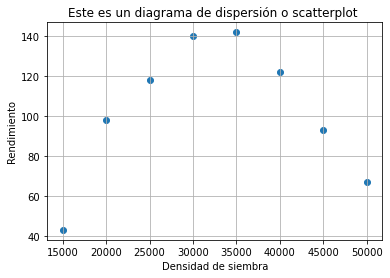

In [8]:
import numpy as np 

import matplotlib.pyplot as plt 


plt.scatter(d, R) 

plt.title("Este es un diagrama de dispersión o scatterplot ")

plt.xlabel('Densidad de siembra')
plt.ylabel('Rendimiento')

plt.grid()




# Determinar el modelo cuadrático

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
d_poly = poly_features.fit_transform(d.reshape(-1,1))
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(d_poly, R)   # Genera el modelo que mejor ajusta los datos 
c,b,a = lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1],  # ax^{2} + bx + c

AttributeError: 'Symbol' object has no attribute 'reshape'

array([135.45214286])

In [30]:
from sympy import * 

a, b, c, R, x = var('a, b, c, R, x')
c,b,a = lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1],  # ax^{2} + bx + c

( a*x**2+ b*x + c).evalf()  

-2.78333333333333e-7*x**2 + 0.0184654761904762*x - 166.732142857143

# Graficar los datos con el modelo

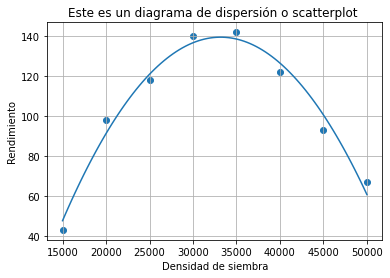

In [41]:
dominio = np.linspace(min(d), max(d), 100)
rango = a*dominio**2+b*dominio + c

plt.plot(dominio, rango)

plt.scatter(d, R) 

plt.title("Este es un diagrama de dispersión o scatterplot ")

plt.xlabel('Densidad de siembra')
plt.ylabel('Rendimiento')

plt.grid()


# Utilice el modelo para predecir

In [28]:
lin_reg.predict([[37_000, 37000**2]])

array([135.45214286])